![alt text](fgv_logo_novo.jpg)

# Machine Learning

Vamos começar a falar sobre os algoritmos de machine learning, começando por um de regressão. <br>
Regressão linear é um algoritmo largamente utilizado, tendo já completado dois séculos de existência desde que sua primeira forma de utilização foi publicada no começo do século XIX.

Apesar de não ser o que conduz ao melhor modelo, daremos os primeiros passos para entender:

* métricas de desempenho de modelos, ou seja como comparar modelos
* estratégias de validação: separação entre treino e teste


Além disso, introduziremos uma notação comum a todos os algoritmos da seguinte maneira:

* $X$ : matriz de features
* $y$ : vetor com os objetivos da predição


# Regressão

***

***
<div class="span5 alert alert-info">

<p> Fornecidos $x$ and $y$, o objetivo da regressão linear é: </p>
<ul>
  <li> Criar um <b>modelo preditivo</b> para predizer o $y$ a partir de $x_i$</li>
  <li> Modelar a <b>importancia</b> entre cada variável dependente $x_i$ e $y$</li>
    <ul>
      <li> Nem todos os $x_i$ tem relação com $y$</li>
      <li> Quais $x_i$ que mais contribuem para determinar $y$? </li>
    </ul>
</ul>
</div>

### recap
***

[Regressão Linear](http://en.wikipedia.org/wiki/Linear_regression) é um metodo para modelar a relação entre um conjunto de variaveis independentes $x$ (explanatórias, features, preditores) e uma variável dependente $Y$.  Esse metodo assume que $x$ tem uma relação linear com $y$.  

$$ y = \beta_0 + \beta_1 x + \epsilon$$

one $\epsilon$ refere-se a um erro. 

* $\beta_0$ é a intercepto do modelo

* O objetivo será estimar os coeficientes (e.g. $\beta_0$ and $\beta_1$). Representamos as estimativas com o "chapeu" em cima da letra. 

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Uma vez obtido a estimativa dos coeficientes $\hat{\beta}_0$ and $\hat{\beta}_1$, podemos usar para predizer novos valores de $Y$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Regressão Linear Multipla é quando há mais de uma variavel independente
    * $x_1$, $x_2$, $x_3$, $\ldots$

$$ y = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p + \epsilon$$ 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#### Importando o dataset:

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Carregando o dataframe

In [6]:
# carregando o df
boston_df = pd.DataFrame(boston.data)

# nome das colunas
boston_df.columns = boston.feature_names

#### Explorando o dataframe

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


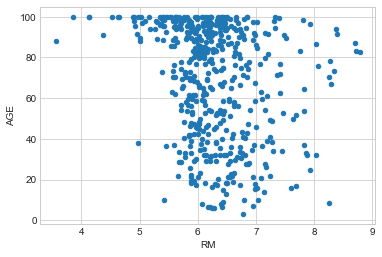

In [8]:
boston_df.plot(kind='scatter', x = 'RM', y = 'AGE')

/Users/hitoshinagano/code/.virtualenvs/jupyterlab_test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


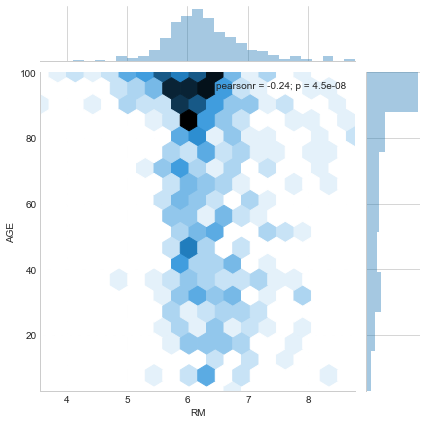

In [9]:
sns.jointplot(data=boston_df, x = 'RM', y = 'AGE', kind = 'hex')

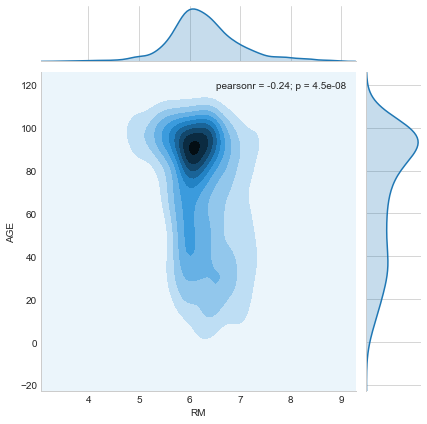

In [10]:
sns.jointplot(data=boston_df, x = 'RM', y = 'AGE', kind = 'kde')

In [11]:
# introduzindo a coluna de precos
boston_df['Preco'] = boston.target

In [12]:
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preco
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28,19.6
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.1
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34,14.3
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,9.68,18.9


Text(0,0.5,'Numero de towns')

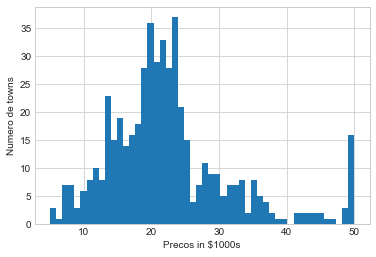

In [13]:
# Histograma dos preços (alvo da predição)
plt.hist(boston_df['Preco'],bins=50)

# Nome dos eixos
plt.xlabel('Precos in $1000s')
plt.ylabel('Numero de towns')

In [14]:
boston_df_sample = boston_df.sample(frac = 0.1)

/Users/hitoshinagano/code/.virtualenvs/jupyterlab_test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,50,'Media da qtd de comodos por habitacao')

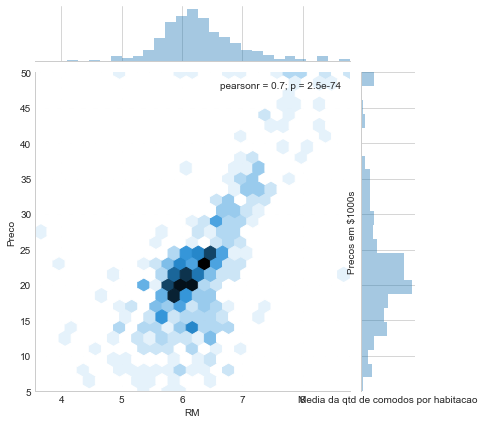

In [15]:
# Plotando a coluna #5 (RM)
# plt.scatter(boston_df['RM'], boston_df['Preco'])

sns.jointplot(data = boston_df, x = 'RM', y = 'Preco', kind = 'hex')

#label
plt.ylabel('Precos em $1000s')
plt.xlabel('Media da qtd de comodos por habitacao')

### Problema de negócio: Quero predizer o preço.

#### Se eu tivesse somente uma feature...
(e usando scipy)

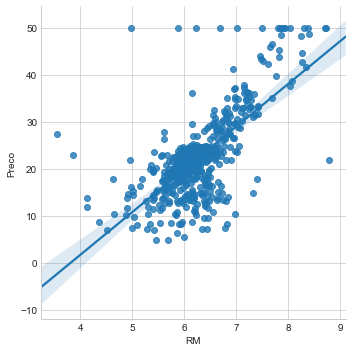

In [16]:
# como seria...
sns.lmplot('RM', 'Preco', data=boston_df, fit_reg=True)

In [17]:
# Tentem isso tambem...
# sns.jointplot('RM', 'Preco', data=boston_df, kind = 'reg')

#### Objetivo: encontrar os "melhores" $a$ e $b$ 

$y = a.x + b$

onde

* $y$ : preço
* $x$ : qtd média de quartos

In [18]:
from scipy import stats
import numpy as np
X = boston_df.RM
y = boston_df.Preco
a, b, r_value, p_value, std_err = stats.linregress(X,y)

inclinacao, intercepto = a, b  # 

In [19]:
print (inclinacao)
print (intercepto)

9.102108981180308
-34.670620776438554


In [20]:
quartos = np.array(X)
precos = np.array(y)

pred = a * quartos + b 


In [21]:
# RMSE
rmse = np.sqrt(np.mean((pred - precos) ** 2))
print ('RMSE =', rmse)

RMSE = 6.603071389222561


Uma interpretação do RMSE

In [22]:
r = 6
p = a * r + b

print ('Para uma cidade (town) cuja media de comodos é', r, 'comodos...')
print ('o preço previsto será %.2f, e ...'% p)
print ('... em 68%% das observações, o preco fica entre %.2f e %.2f.' % (p - rmse, p + rmse))
print ('... em 95%% das observações, o preco fica entre %.2f e %.2f.' % (p - 2*rmse, p + 2*rmse))

Para uma cidade (town) cuja media de comodos é 6 comodos...
o preço previsto será 19.94, e ...
... em 68% das observações, o preco fica entre 13.34 e 26.55.
... em 95% das observações, o preco fica entre 6.74 e 33.15.


#### Como encontrar os "melhores" $a$ e $b$?
** => Metodo dos minimos quadrados **

In English: Least Squares Method.<br>
Como seaborn encontra a linha acima?

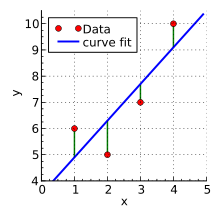

In [23]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Pergunta: qual a melhor linha azul que representa o conjunto de pontos vermelhos? <br>
Resposta: a que minimiza a soma dos quadrados das linhas verdes (o erro)

\begin{equation*}
MSE\quad = \frac { 1 }{ n } \sum _{ i=0 }^{ n-1 }{ { { (\hat { { y }^{ (i) } }  } }-{ y }^{ (i) })^{ 2 } }   \quad 
\end{equation*}

\begin{equation*}
RMSE\quad = \sqrt { \frac { 1 }{ n } \sum _{ i\quad =\quad 0 }^{ n-1 }{ { { (\hat { { y }^{ (i) } }  } }-{ y }^{ (i) })^{ 2 } }   } \quad  
\end{equation*}

#### agora com multiplas variáveis

In [24]:
# primeira observação:
boston_df.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Preco       24.00000
Name: 0, dtype: float64

Notação:

$x^{(0)}_{CRIM} = 0.00632$

$x^{(0)}_{ZN} = 18.00000$

$x^{(0)}_{LSTAT} = 4.98$

$y^{(0)} = 24$

A principal "jogada" da regressão linear é considerar que cada feature contribui linearmente na composição do preço:

$\hat{y^{(i)}} = a_{CRIM}.x^{(i)}_{CRIM} + a_{ZN}.x^{(i)}_{ZN} + ... + a_{LSTAT}.x^{(i)}_{LSTAT} + b$, <br>

para $i = 0, 1, 2,..., n-1$ 

e o objetivo será encontrar $a_{CRIM}, a_{ZN}, ...,a_{LSTAT}, b$ que minimizam o erro 

Numa forma matricial, podemos re-escrever o problema da seguinte maneira:


\begin{equation*}
\mathbf{X}.\mathbf{a} = \hat{\mathbf{y}}
\end{equation*}

<br>


\begin{equation*}
\mathbf{X} =  \begin{bmatrix}
x^{(0)}_{CRIM} & x^{(0)}_{ZN} & ... & x^{(0)}_{LSTAT} & 1 \\
x^{(1)}_{CRIM} & x^{(1)}_{ZN} & ... & x^{(1)}_{LSTAT} & 1 \\
... & ... & ... & ...\\
x^{(n-1)}_{CRIM} & x^{(n-1)}_{ZN} & ... & x^{(n-1)}_{LSTAT} & 1 \\
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\mathbf{a} =  \begin{bmatrix}
a_{CRIM} \\
a_{ZN} \\
... \\
a_{LSTAT}\\
b \\
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\mathbf{y} =  \begin{bmatrix}
\hat{y^{(0)}} \\
\hat{y^{(1)}} \\
... \\
\hat{y^{(n-1)}}\\
\end{bmatrix}
\end{equation*}

#### Engenharia e seleção de features... 

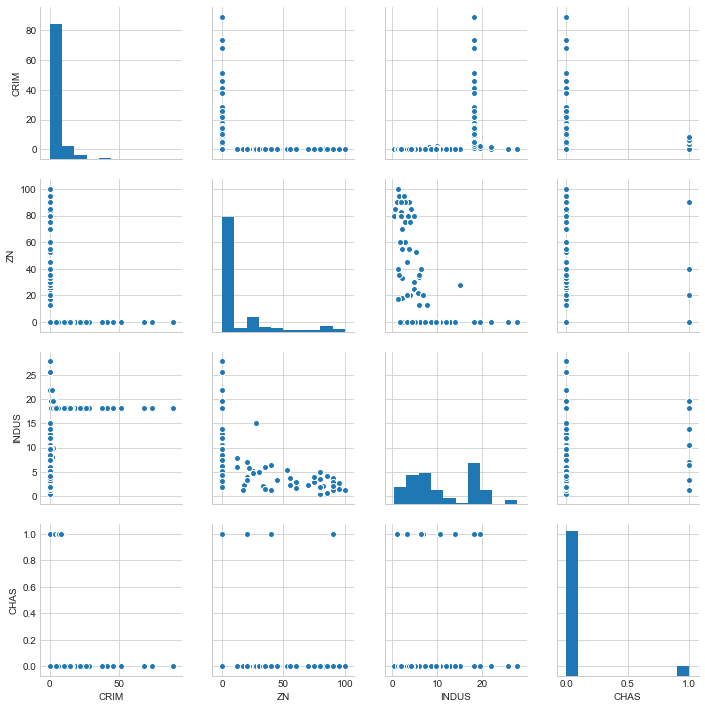

In [25]:
sns.pairplot(data=boston_df.iloc[:,:4])

In [26]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Preco'],
      dtype='object')

### treinamento e predição com sklearn começam aqui...

In [27]:
# Regressão linear - sklearn
import sklearn
from sklearn.linear_model import LinearRegression

In [28]:
lreg = LinearRegression()

Funções utilizadas:

* `lreg.fit()` : para treinar o modelo

* `lreg.predict()` : predição do valor, segundo um modelo treinado

* `lreg.score()` : retorna o coeficiente de determinação (R^2), uma medida de quão bem o modelo captura as observações. 

In [30]:
# Separando as matrizes X (features) e y (labels)

X = boston_df.drop('Preco', axis = 1)
y = boston_df.Preco

In [31]:
lreg.fit(X, y)

/Users/hitoshinagano/code/.virtualenvs/jupyterlab_test/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print ('Valor do coeficiente b, tambem chamado de intercept:', lreg.intercept_)

Valor do coeficiente b, tambem chamado de intercept: 36.49110328036162


In [33]:
# Vamos agora ver os coeficientes:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# coluna com os coeficientes
coeff_df["Estimativa dos coeficientes"] = pd.Series(lreg.coef_)

# mostra coeficientes
coeff_df

,Features,Estimativa dos coeficientes
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


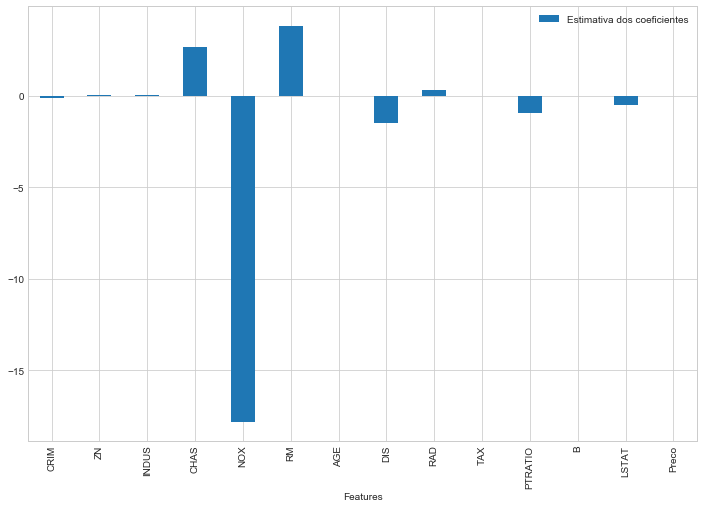

In [34]:
coeff_df.set_index('Features').plot(kind = 'bar', figsize = (12, 8))

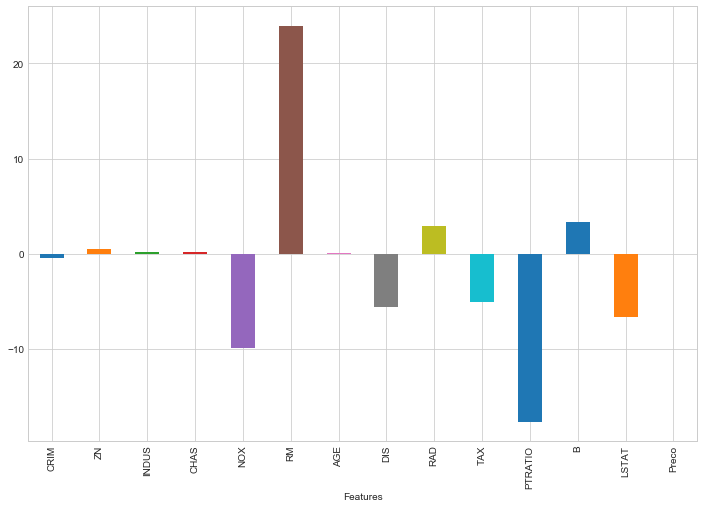

In [35]:
# calibrando os coeficientes pelo valor medio da variavel

coeff_df.set_index('Features', inplace = True)

coeff_df = pd.concat([coeff_df, boston_df.mean()], axis = 1).rename(columns = {0: 'media'})

coeff_df['coef_vezes_media'] = coeff_df['Estimativa dos coeficientes'] * coeff_df.media

coeff_df.coef_vezes_media.plot(kind = 'bar', figsize = (12, 8))

In [36]:
print("Treinei com X: RMSE com y: %.2f"  
      % np.sqrt(np.mean((y - lreg.predict(X)) ** 2)))

Treinei com X: RMSE com y: 4.68


## Treinamento e Validação

### Objetivo de separar os dados em treinamento e teste
***
<div class="span5 alert alert-info">

<p> No exemplo acima: </p>
<ul>
  <li> Treinamos e testamos na mesma base </li>
  <li> É esperado que as predições sobre essa base sejam boas, mas e quanto a novos dados? </li>
    <ul>
      <li> sim novos dados</li>
    </ul>
  <li> Um solução seria repartir dados, reservando uma parte para <b>teste</b> e <b>treinando</b> o modelo no restante </li>
  <li> isso se chama validação cruzada </li>  
</ul>
</div>

***

In [37]:
# Repartindo o dados em treinamento e validação
X_train, X_valid, y_train, y_valid = train_test_split(X,boston_df.Preco)

In [38]:
# quais são os shapes de cada parte
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(379, 13) (127, 13) (379,) (127,)


#### Predição de preços

In [39]:
# recriando o objeto 
lreg = LinearRegression()

# treinando de novo, mas somente com os dados de treinamento
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Predição das observações de validação
pred_train = lreg.predict(X_train)
pred_valid = lreg.predict(X_valid)

In [41]:
print("Treinei com X_train: RMSE com y_train: %.2f"  
      % np.sqrt(np.mean((y_train - pred_train) ** 2)))
    
print("Treinei com X_train, RMSE sobre X_valid e y_valid: %.2f"  
      % np.sqrt( np.mean((y_valid - pred_valid) ** 2)) )

Treinei com X_train: RMSE com y_train: 4.61
Treinei com X_train, RMSE sobre X_valid e y_valid: 5.07


In [42]:
# R^2 desse fit
lreg.score(X_valid, y_valid)

0.7063519176170139

### Referencias

* Link para os modulos de machine learning: [SciKit Learn](http://scikit-learn.org/stable/)
* Curso Machine Learning Andrew Ng: [Coursera](https://www.coursera.org/learn/machine-learning)
* Curso Data Analysis Jose Portilla: [Udemy](https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/t/lecture/2338236?start=0)
* Curso CS109 Harvard: [Harvard](http://cs109.github.io/2015)